## Data Understanding

Starting by importing the necessary libraries

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

Basic exploration of the data

In [32]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.info() #Gives total number of columns and entries, as well as all

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [33]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Exploratory Data Analysis

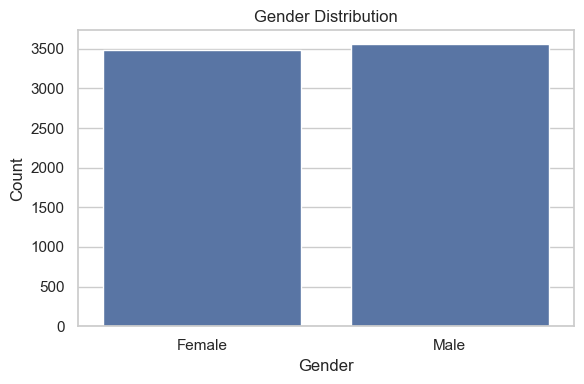

In [34]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig('../gender_distribution.png')
plt.show()

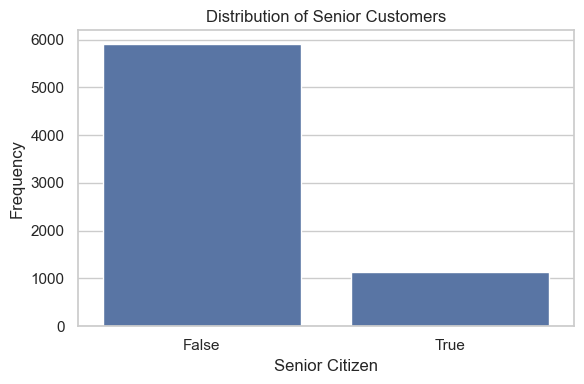

In [35]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='SeniorCitizen')
plt.title('Distribution of Senior Customers')
plt.xlabel("Senior Citizen")
plt.ylabel("Frequency")
plt.xticks([0, 1], ['False', 'True'])
plt.tight_layout()
plt.savefig('../senior_distribution.png')
plt.show()

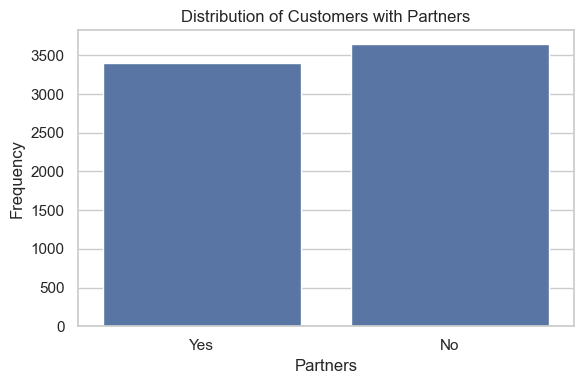

In [36]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Partner')
plt.title('Distribution of Customers with Partners')
plt.xlabel("Partners")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig('../partner_distribution.png')
plt.show()

C:\Users\gomom\AppData\Local\Temp\ipykernel_22908\600654578.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Dependents', palette='flare')


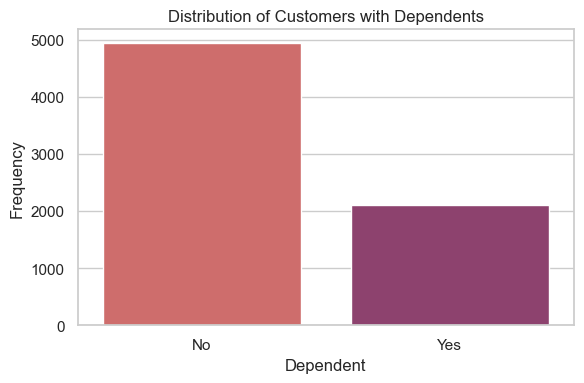

In [37]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Dependents', palette='flare')
plt.title('Distribution of Customers with Dependents')
plt.xlabel("Dependent")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig('../dependent_distribution.png')
plt.show()

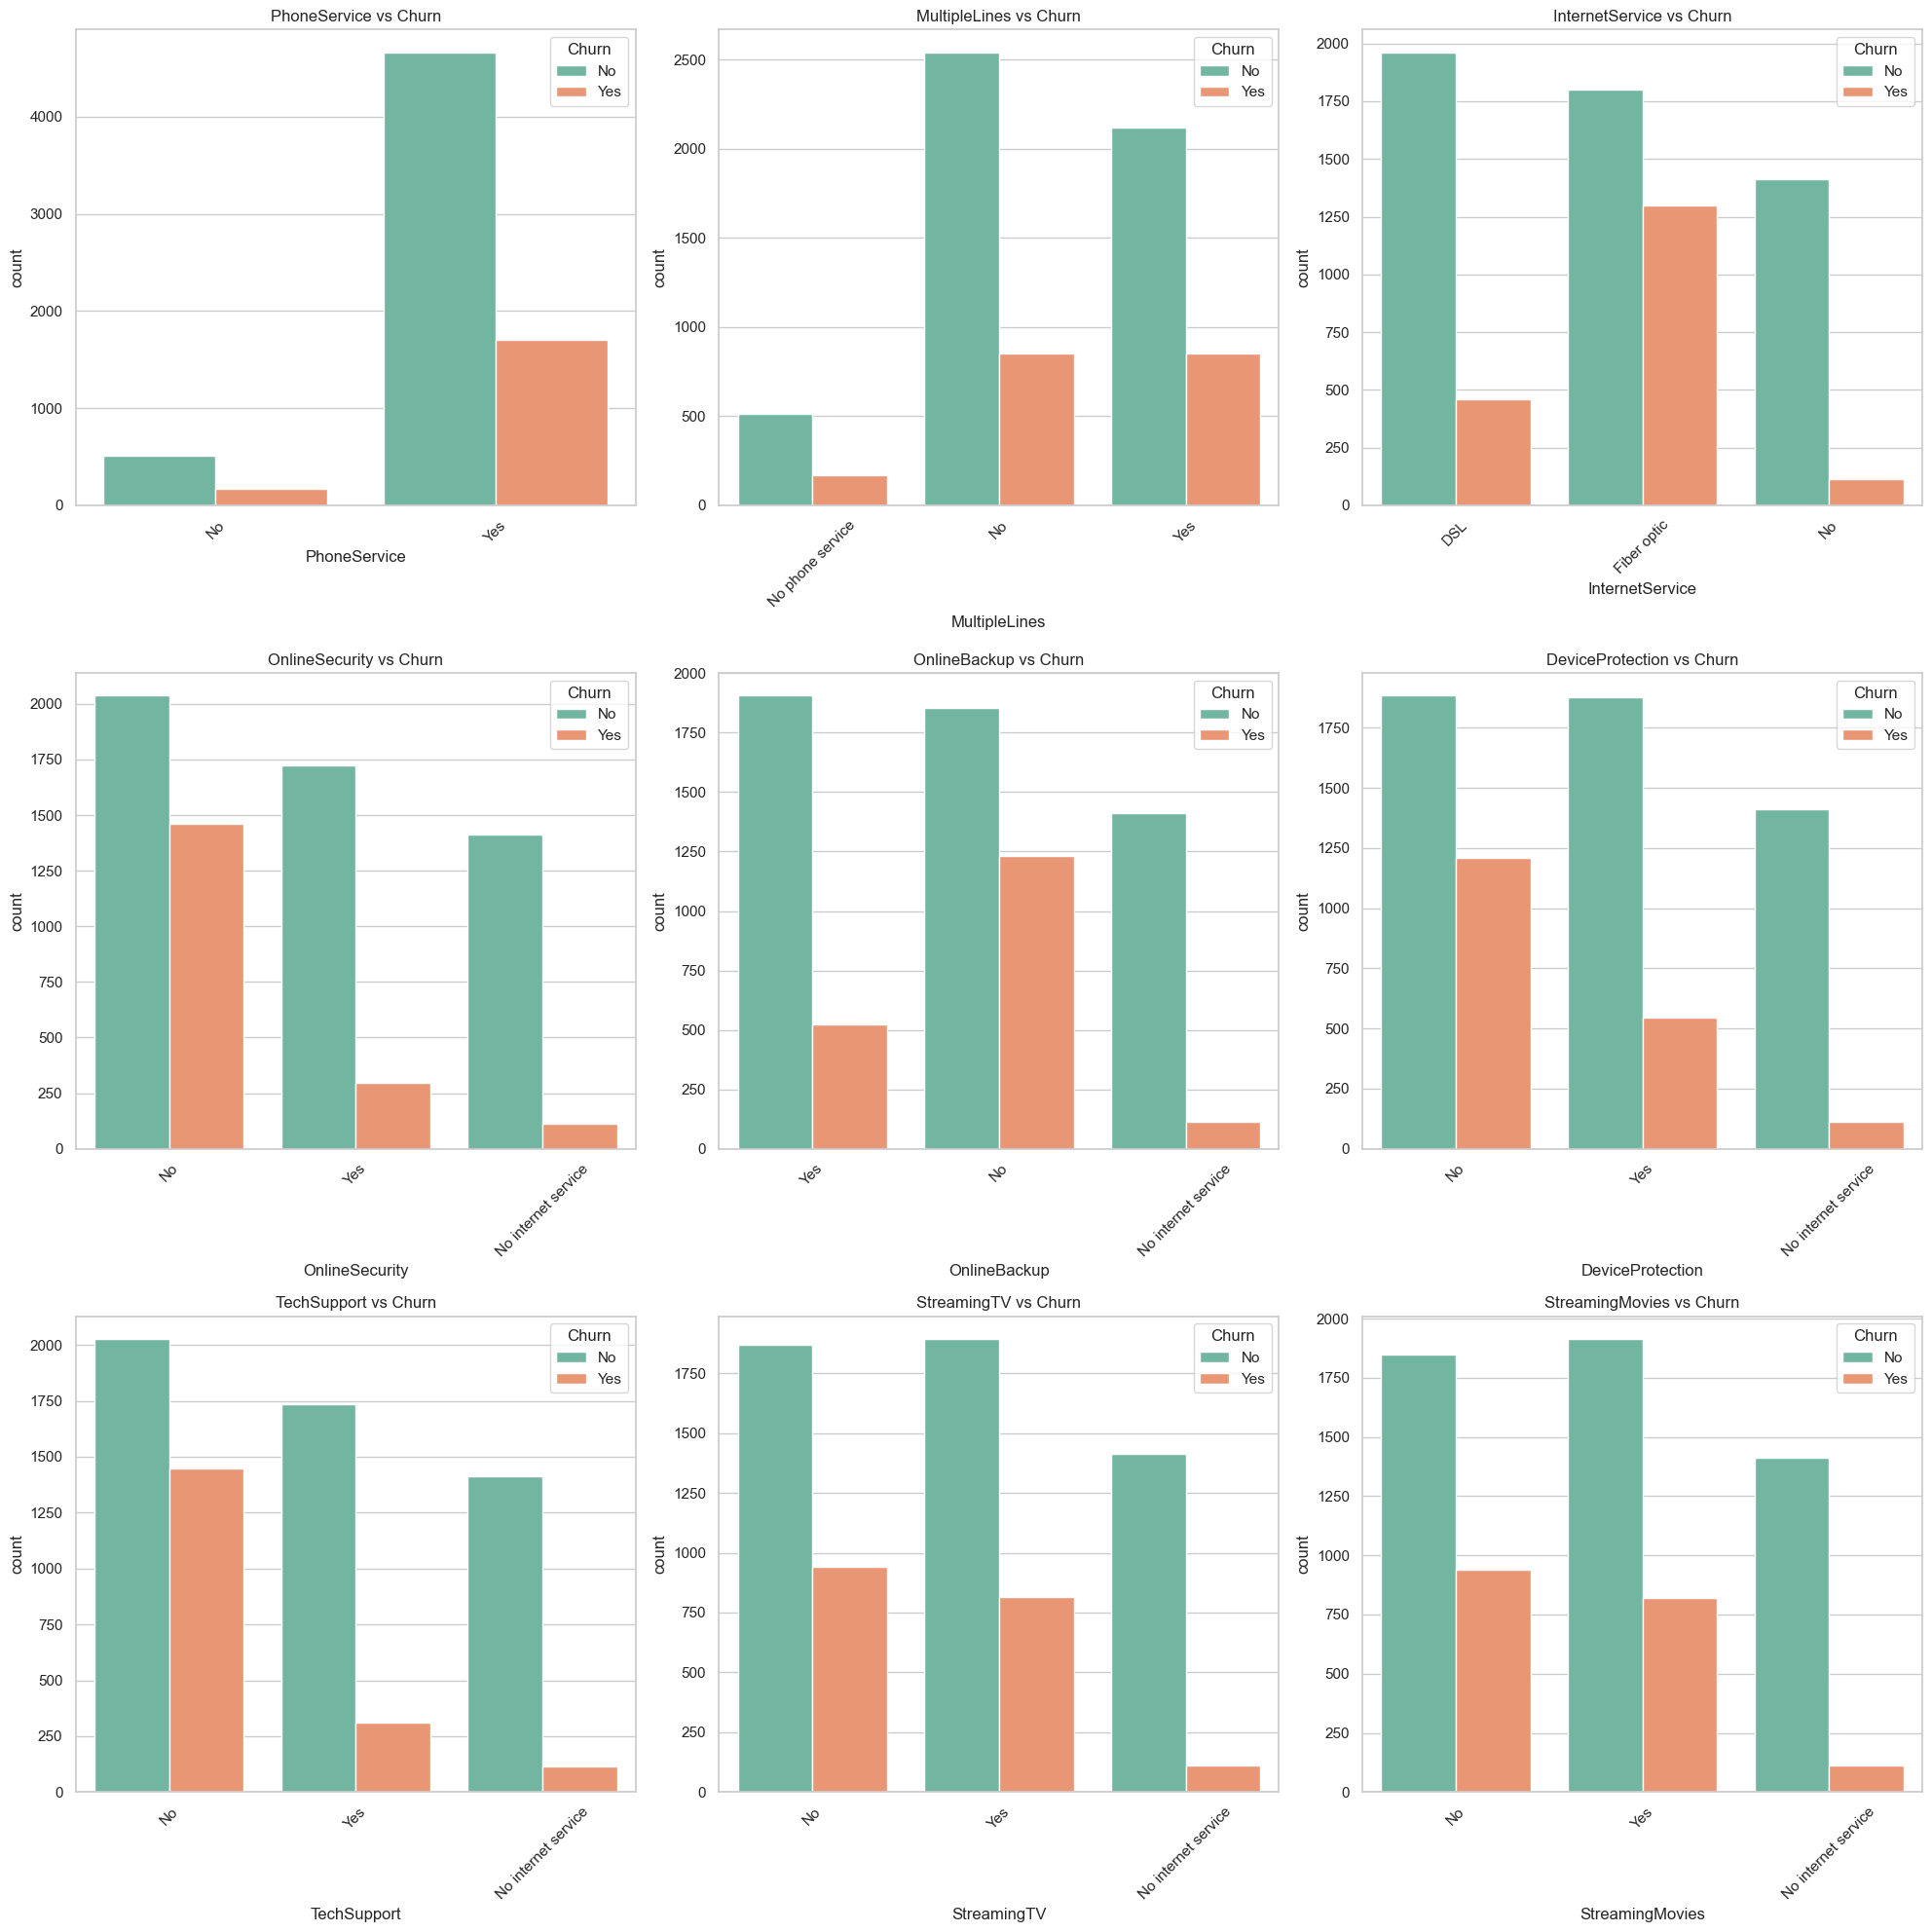

In [38]:
services_cols = ['PhoneService', 'MultipleLines', 'InternetService',
                 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(20, 20))
for i, col in enumerate(services_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=col, hue='Churn', palette='Set2')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../services_subscribed_vs_churn.png')
plt.show()

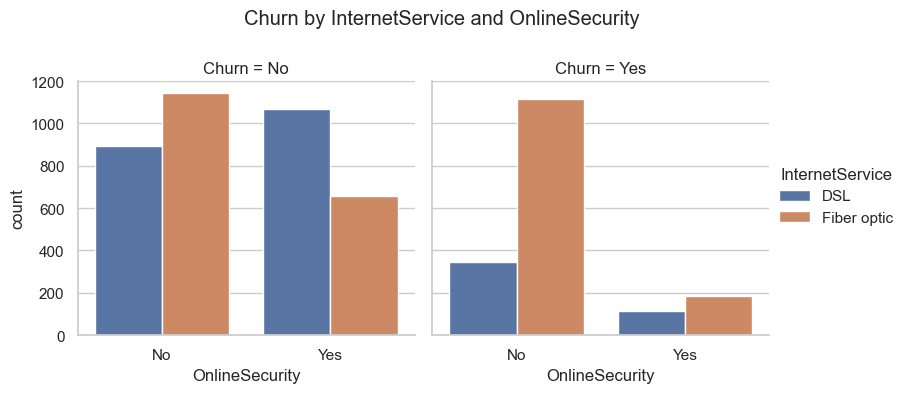

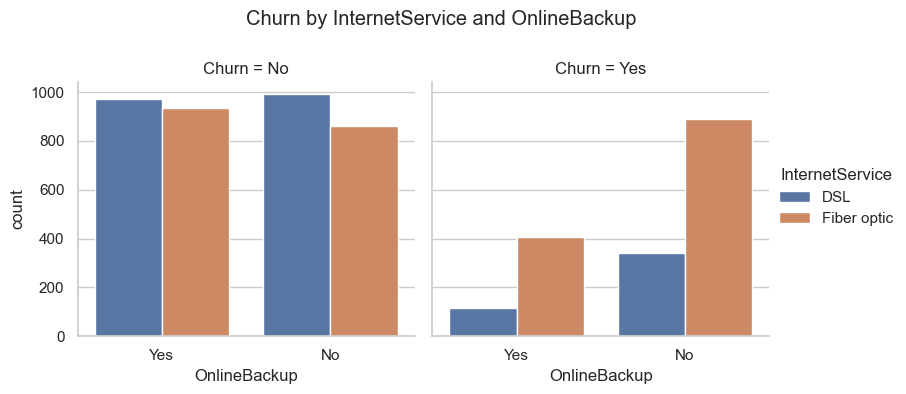

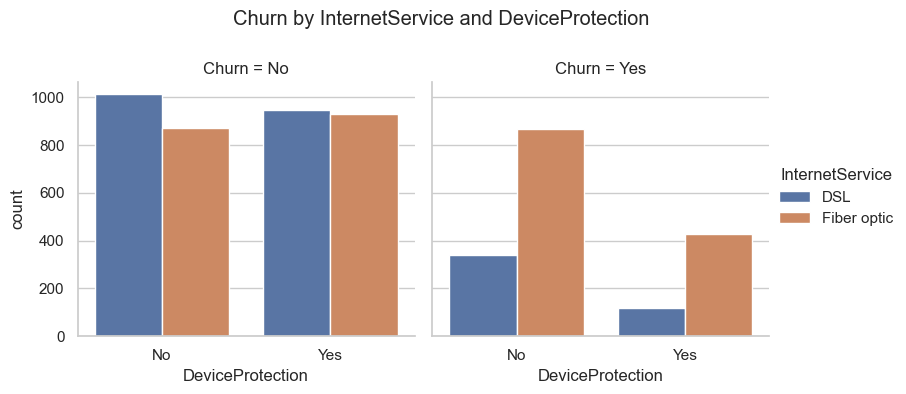

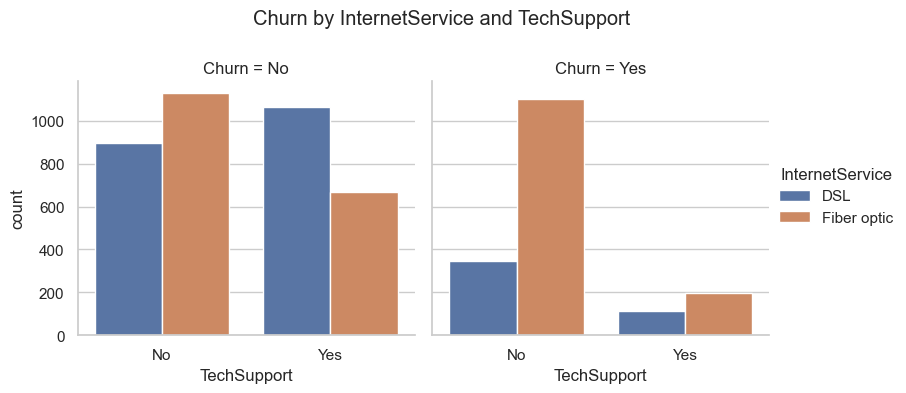

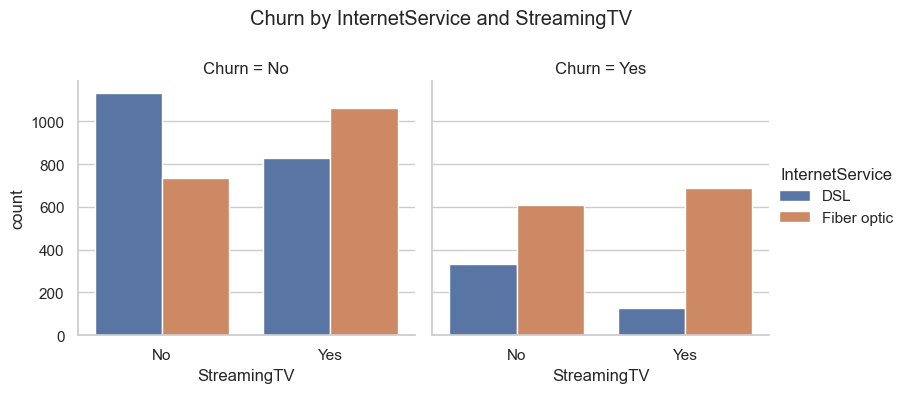

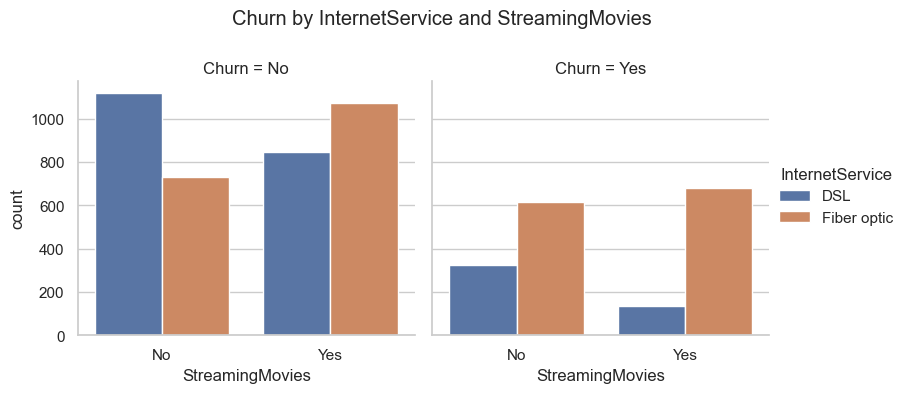

In [45]:
internet_features = [
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies"
]

for feature in internet_features:
    g = sns.catplot(
        data=df_internet,
        x=feature,
        hue="InternetService",
        col="Churn",
        kind="count",
        height=4,
        aspect=1
    )
    g.fig.subplots_adjust(top=0.8)
    g.fig.suptitle(f"Churn by InternetService and {feature}")
    plt.savefig(f"../Churn by InternetService and {feature}")
    plt.show()

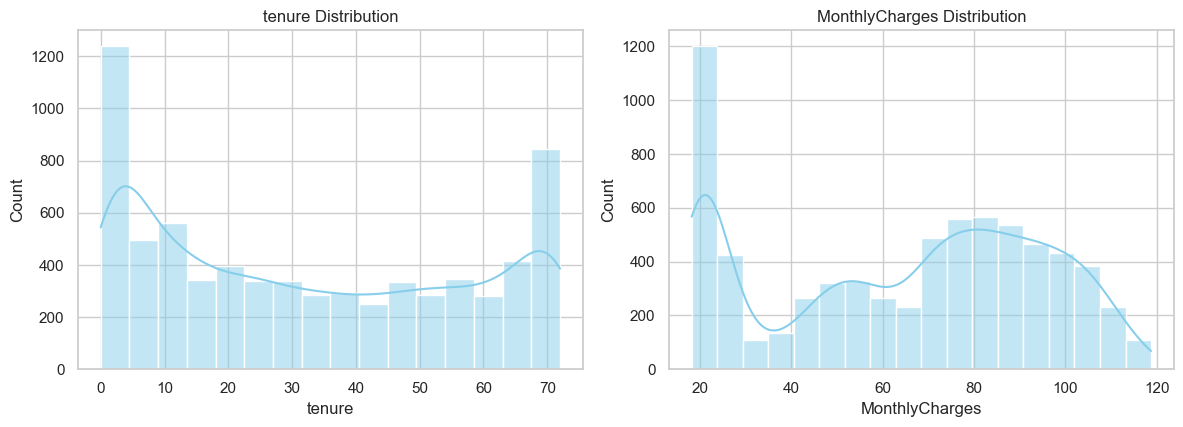

C:\Users\gomom\AppData\Local\Temp\ipykernel_22908\2799285724.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')
C:\Users\gomom\AppData\Local\Temp\ipykernel_22908\2799285724.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')


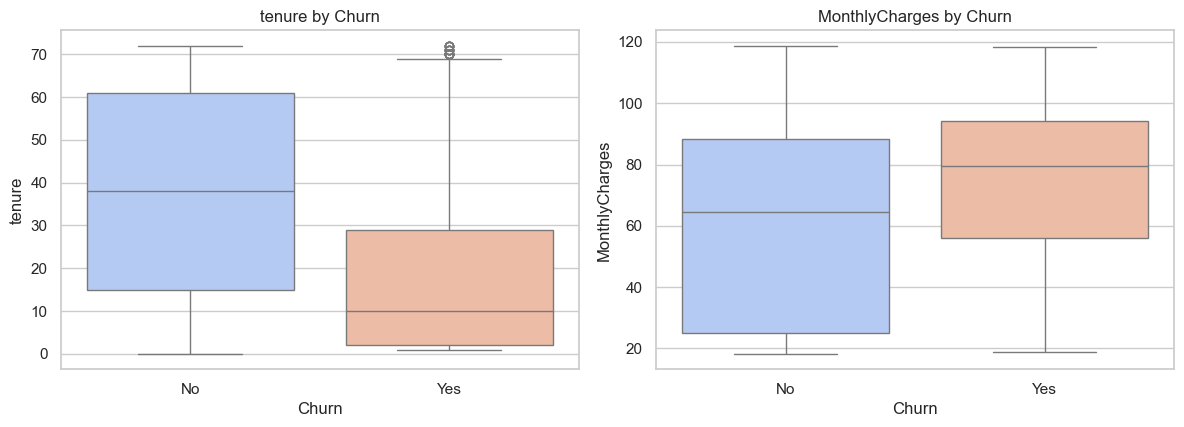

In [40]:

num_cols = ['tenure', 'MonthlyCharges']

# Histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

# Boxplots vs Churn
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')
    plt.title(f'{col} by Churn')
plt.tight_layout()
plt.show()

C:\Users\gomom\AppData\Local\Temp\ipykernel_22908\1814915291.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


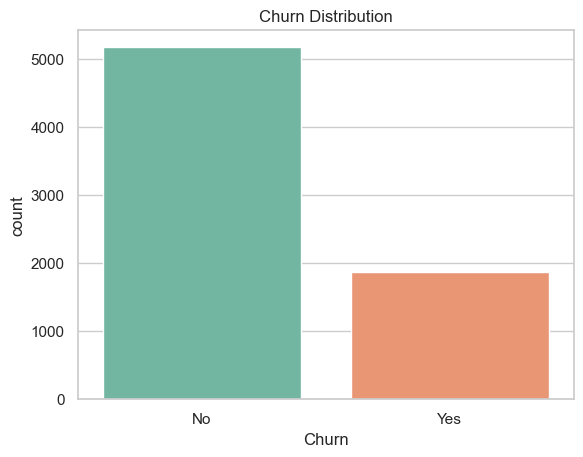

In [41]:
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Churn Distribution')
plt.savefig("../churn_distribution")
plt.show()

<Axes: xlabel='tenure', ylabel='Count'>

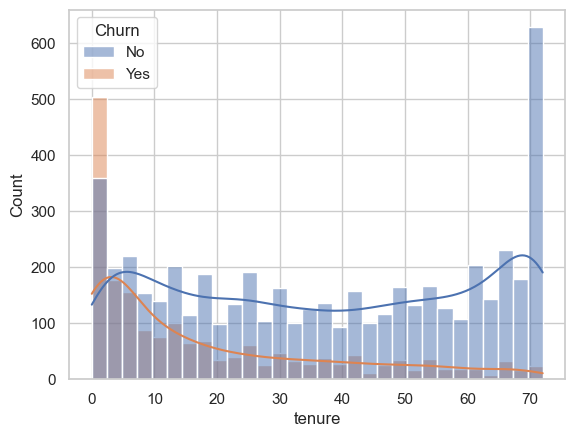

In [42]:
sns.histplot(data=df, x="tenure", hue="Churn", bins=30, kde=True)